# (a)

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [102]:
df = pd.read_csv('CC General.csv')     #Reading the dataset

In [103]:
df.head()          #To visualize the attributes of the data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [104]:
df.describe()       #Gives an insight on the stastical inferences of the data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [105]:
df.shape      #Getting the no. of attributes in the dataset

(8950, 18)

In [106]:
df.isnull().sum()     #Checking for null values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [107]:
df = df.drop("CUST_ID", axis = 1)       #Dropping the categorical column

In [108]:
df = df.fillna(df.mean())        #Filling the missing values 

In [109]:
df.head()           #Checking again after dropping customer ID

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [110]:
df.isnull().sum()     #Checking for null values

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# (b)

In [111]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(df)        # Scaling the dataset
print(X_Scale)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


In [112]:
normal = preprocessing.Normalizer().fit(X_Scale)       #Normalizing the raw input data
X_Norm = normal.transform(X_Scale)
print(X_Norm)              

[[-0.31193826 -0.10629684 -0.1810716  ... -0.13251924 -0.22396426
   0.15370408]
 [ 0.21992533  0.03753859 -0.13122171 ...  0.02495877  0.06545742
   0.10079608]
 [ 0.12668203  0.14678317 -0.03050449 ... -0.02880315 -0.14889876
   0.10218749]
 ...
 [-0.1569743  -0.03932355 -0.085222   ... -0.07112317  0.0697948
  -0.87408185]
 [-0.15431961 -0.03841074 -0.09724043 ... -0.07184155  0.06817468
  -0.85379209]
 [-0.11520725 -0.17888144  0.00848011 ... -0.06699181 -0.10574557
  -0.82953785]]


In [113]:
X_normalized = pd.DataFrame(X_Norm)       #Converting from array to panda
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-1.841058e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400


# (c) 

In [114]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Norm)       #Applying PCA and reducing the no. features to 2

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-0.489826,-0.679678
1,-0.518792,0.545011
2,0.330885,0.268978
3,-0.482374,-0.092111
4,-0.563289,-0.481915


# (d)

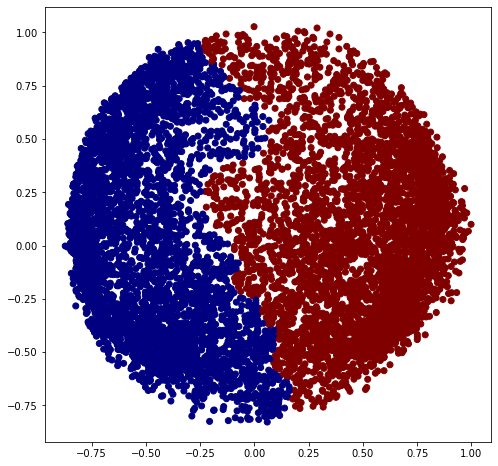

In [115]:
# Using scatter plot to visualize for k =2
Agglo_Cluster2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(8,8))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
c = Agglo_Cluster2.fit_predict(principalDf), cmap ='jet')
plt.show()

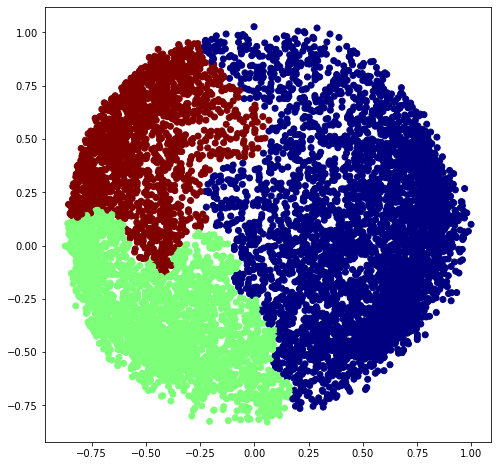

In [116]:
# Using scatter plot to visualize for k =3
Agglo_Cluster3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(8,8))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
c = Agglo_Cluster3.fit_predict(principalDf), cmap ='jet')
plt.show()

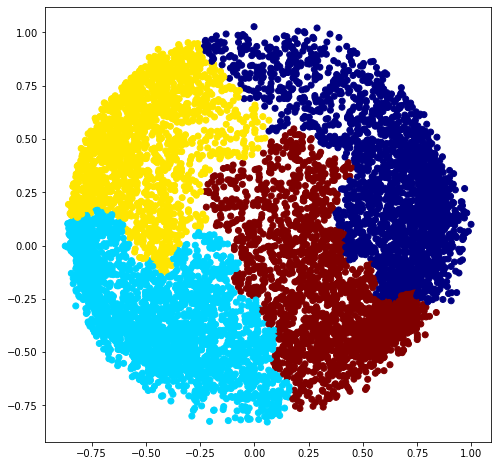

In [117]:
# Using scatter plot to visualize for k = 4
Agglo_Cluster4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(8,8))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
c = Agglo_Cluster4.fit_predict(principalDf), cmap ='jet')
plt.show()

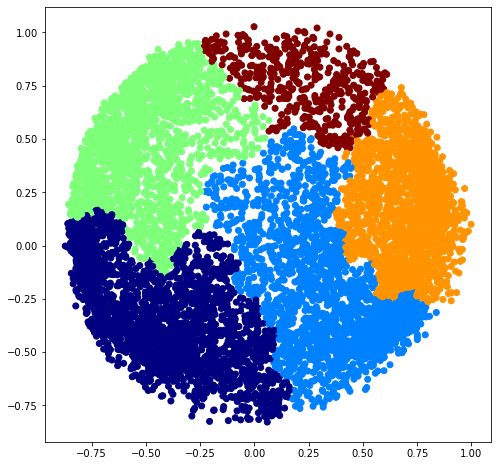

In [118]:
# Using scatter plot to visualize for k = 5
Agglo_Cluster5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(8,8))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
c = Agglo_Cluster5.fit_predict(principalDf), cmap ='jet')
plt.show()

# (e)

In [126]:
k = [2, 3, 4, 5]
 
#Calculating the silhouette score of different clusters
Silhouette = []
Silhouette.append(silhouette_score(principalDf, Agglo_Cluster2.fit_predict(principalDf)))
print("Silhouetter score for 2 clusters is =", Silhouette[0])
Silhouette.append(silhouette_score(principalDf, Agglo_Cluster3.fit_predict(principalDf)))
print("Silhouetter score for 3 clusters is =", Silhouette[1])
Silhouette.append(silhouette_score(principalDf, Agglo_Cluster4.fit_predict(principalDf)))
print("Silhouetter score for 4 clusters is =", Silhouette[2])
Silhouette.append(silhouette_score(principalDf, Agglo_Cluster5.fit_predict(principalDf)))
print("Silhouetter score for 5 clusters is =", Silhouette[3])



Silhouetter score for 2 clusters is = 0.43732429968658376
Silhouetter score for 3 clusters is = 0.4167229777336913
Silhouetter score for 4 clusters is = 0.35310621312499907
Silhouetter score for 5 clusters is = 0.3505508235543066


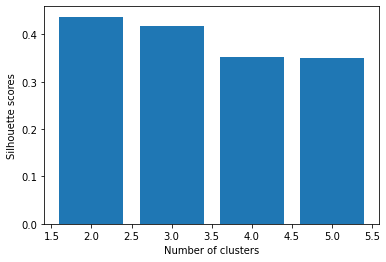

In [124]:
# Plotting a bar graph to compare the results
plt.bar(k, Silhouette)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette scores', fontsize = 10)
plt.show()